In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
caller_location = pd.read_csv('caller_locations2P93.csv', index_col='index', parse_dates=['time'])

In [11]:
caller_location

Unnamed: 0  callingcellid  date_key               call_date  \
index                                                                 
83               0   4.122030e+14  20161205    12/5/2016 5:50:54 PM   
99               1   4.122030e+14  20161202   12/2/2016 11:22:09 AM   
172              2   4.122030e+14  20161213   12/13/2016 7:12:06 PM   
175              3   4.122030e+14  20161203    12/3/2016 2:30:12 PM   
332              4   4.122030e+14  20161201   12/1/2016 11:33:11 AM   
618              5   4.122030e+14  20161202    12/2/2016 4:30:14 PM   
720              6   4.122030e+14  20161205    12/5/2016 6:32:02 PM   
855              7   4.122030e+14  20161204   12/4/2016 12:11:26 PM   
925              8   4.122030e+14  20161201    12/1/2016 2:25:36 PM   
936              9   4.122030e+14  20161205    12/5/2016 5:54:09 PM   
1161            10   4.122030e+14  20161201   12/1/2016 11:58:04 AM   
1203            11   4.122030e+14  20161201   12/1/2016 12:38:08 PM   
1234            12   4.122030e+14  20161203    12/3/2016 8:49:16 AM   
1391            13   4.122030e+14  20161203    12/3/2016 8:30:42 AM   
1445            14   4.122030e+14  20161202   12/2/2016 12:30:45 PM   
1591            15   4.122030e+14  20161202   12/2/2016 12:34:03 PM   
1817            16   4.122030e+14  20161204    12/4/2016 5:50:20 PM   
1824            17   4.122030e+14  20161206    12/6/2016 2:56:30 PM   
1837            18   4.122030e+14  20161206   12/6/2016 12:33:01 PM   
1901            19   4.122030e+14  20161203    12/3/2016 7:23:09 AM   
1924            20   4.122030e+14  20161209    12/9/2016 6:37:15 PM   
1961            21   4.122030e+14  20161209    12/9/2016 7:18:45 PM   
2189            22   4.122030e+14  20161217   12/17/2016 5:38:15 PM   
2258            23   4.122010e+14  20161223  12/23/2016 10:52:31 AM   
2460            24   4.122030e+14  20161215   12/15/2016 5:33:51 PM   
2555            25   4.122030e+14  20161216  12/16/2016 10:17:28 AM   
2858            26   4.122030e+14  20161202    12/2/2016 7:26:50 AM   
2880            27   4.122030e+14  20161211   12/11/2016 5:58:21 PM   
2912            28   4.122030e+14  20161210   12/10/2016 6:25:24 PM   
3116            29   4.122030e+14  20161205    12/5/2016 3:27:08 PM   
...            ...            ...       ...                     ...   
80761          310   4.122030e+14  20170101     1/1/2017 7:47:57 AM   
80801          311   4.122030e+14  20170113    1/13/2017 6:22:50 PM   
80959          313   4.122030e+14  20170108     1/8/2017 1:04:57 PM   
81730          314   4.122030e+14  20170114    1/14/2017 6:14:01 PM   
82351          316   4.122030e+14  20170113    1/13/2017 8:08:45 AM   
83006          318   4.122030e+14  20170115    1/15/2017 8:20:24 AM   
84078          320   4.122030e+14  20170117    1/17/2017 8:50:50 AM   
85717          321   4.122030e+14  20160911    9/11/2016 5:37:51 PM   
89566          322   4.122030e+14  20160905     9/5/2016 1:27:34 PM   
95864          323   4.122030e+14  20160926    9/26/2016 7:15:19 PM   
95866          324   4.122030e+14  20160926    9/26/2016 7:10:08 PM   
108818         325   4.122030e+14  20160903     9/3/2016 9:50:30 AM   
109648         326   4.122030e+14  20160903     9/3/2016 9:48:42 AM   
111004         327   4.122030e+14  20160911    9/11/2016 5:13:36 PM   
116720         328   4.122030e+14  20160911    9/11/2016 2:57:52 PM   
117548         329   4.122030e+14  20160903     9/3/2016 9:19:37 AM   
128605         330   4.122030e+14  20170201     2/1/2017 7:38:57 PM   
135286         331   4.122030e+14  20170220    2/20/2017 6:55:10 PM   
135300         332   4.122030e+14  20170220    2/20/2017 6:56:39 PM   
137077         333   4.122030e+14  20170220    2/20/2017 9:41:29 AM   
138615         334   4.122030e+14  20170226    2/26/2017 6:53:44 AM   
147628         335   4.122030e+14  20161111  11/11/2016 12:06:32 PM   
149056         336   4.122030e+14  20161110   11/10/2016 2:45:52 PM   
150483         337   4.122030e+1

In [7]:
columns = ['time', 'day_of_week', 'hour', 'is_weekend', 'is_home_time', 'latitude', 'longitude', 'work_hours']

# Number of `work` data points (work hours + !weekend)
caller_location['work_hours'] = (
    (caller_location['hour'] > 8)
    & (caller_location['hour'] < 17)
    & (caller_location['is_weekend'] == False)
)

caller_location.to_csv('caller_loc_clean.csv', encoding='utf-8', columns=columns)

In [8]:
caller = pd.read_csv('caller_loc_clean.csv', index_col='index', parse_dates=['time'])

In [9]:
len(caller), np.max(caller['time']), np.min(caller['time']), np.max(caller['time']) - np.min(caller['time'])

(301,
 Timestamp('2017-02-26 06:53:44'),
 Timestamp('2016-09-03 09:19:37'),
 Timedelta('175 days 21:34:07'))

## Visualization Work

- Overlay cell tower locations onto a map (around Jalalabad Afghanistan)
- Each cell tower will be denoted by a circle 
    - 1st half will be work times
    - 2nd half will be non work times
- Goal is to show the difference between work and non work
    - And potential job skipping on certain days


Things to note:
    - Afghan holidays and days off?
    - Look at time distribution of calls (time of day + distribution over 175 days)
    - Is Afghanistan's weekend only Friday?
    - Add isWorkTime which comprises of work hours + work days
    - Time dimension for now is less important -> want to have a static map

In [14]:
# 26 cells towers in the area
# `work_hours_count` is the number of instances when the subject made a call at a cell tower during work hours + days
# `total` is the total number of calls at a given cell tower
coordData = caller.groupby(['latitude', 'longitude']).count()

coordData.add_suffix('_count').reset_index()
coordData['workingHours'] = caller.groupby(['latitude', 'longitude']).sum()['work_hours']
coordData['total'] = caller.groupby(['latitude', 'longitude']).count()['hour']

coordData = coordData[['workingHours', 'total']]
coordData.to_csv('coordinate_data.csv', encoding='utf-8')
coordData

workingHours  total
latitude  longitude                     
34.396200 70.487500           0.0      3
34.406400 70.460100           0.0      2
34.416778 70.470556           3.0      3
34.420200 70.438300          23.0     27
34.420300 70.459900           1.0      1
34.424500 70.424500           9.0     21
34.425100 70.449700           8.0      8
34.426500 70.461300          11.0     14
34.429700 70.358600           0.0      1
34.430100 70.442800           2.0      3
34.430900 70.451800           4.0      5
34.432100 70.468200           1.0      5
34.432600 70.458400           4.0      5
34.434100 70.433600           3.0      3
34.434700 70.475800           2.0      2
34.437700 70.415700           0.0      1
34.438000 70.443500           0.0      1
34.440700 70.398000          16.0    116
34.452600 70.513600           0.0      2
34.501100 70.390600          11.0     65
34.503100 70.218000           1.0      1
34.531000 69.158500           0.0      3
34.532500 69.150800           0.0      2
34.533600 69.085600           1.0      5
34.537000 69.210300           1.0      1
34.567900 69.393100           1.0      1

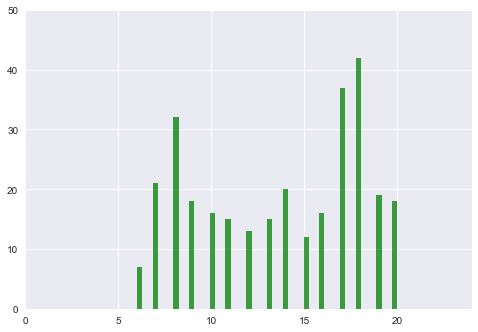

In [146]:
data = caller['hour']
n, bins, patches = plt.hist(data, 50, normed=0, facecolor='green', alpha=0.75)

plt.axis([0, 24, 0, 50])
plt.grid(True)

plt.show()